In [2]:
import numpy as np
import pandas as pd

<h2> Pulling Data </h2>

In [194]:
#tier 1
tier_1_not_target = pd.read_csv("data/big.csv",  encoding = "ISO-8859-1",header=None).head(5000)
tier_1_target = pd.read_csv("data/res.csv")

In [4]:
#tier 2
tier_2_not_target = pd.read_csv("data/justsex.csv")
tier_2_target = pd.read_csv("data/res.csv")

In [5]:
#tier 3
tier_3_not_target = pd.read_csv("data/justsex.csv")
tier_3_target = pd.read_csv("data/underage_full.csv")

In [6]:
#tier 4
tier_4_not_target = tier_2_target
tier_4_target = tier_3_target

In [7]:
#tier 5

tier_5_not_target = tier_1_not_target
one = tier_1_target
one['target'] = 1
three = tier_3_target
three['target'] = 2

tier_5_target = pd.concat([one, three])

<h2> Preprocessing </h2>

In [195]:
###Remove all of the hashtags
import re
def removeHash(s):
    ls = re.findall(r"#(\w+)", str(s))

    
    for i in ls:
        s = str(s).replace(i, "")
    
    return s
    
    

In [196]:
#tier 1

tier_1_not_target['target'] = 0
tier_1_not_target['text'] = tier_1_not_target[5]
tier_1_not_target = tier_1_not_target[['text', 'target']]

In [197]:
tier_1_target['target'] = 1
tier_1_target = tier_1_target[['text', 'target']]

In [198]:
tier1 = pd.concat([tier_1_not_target, tier_1_target])

In [199]:
tier1['text'] = tier1['text'].apply(removeHash)

In [200]:
tier1 = tier1.fillna('missing')
tier1 = tier1.drop_duplicates()

In [14]:
len(tier_1_target)



5197

In [15]:
#tier 2

tier_2_not_target['target'] = 0
# tier_1_not_target['text'] = tier_1_not_target[5]
tier_2_not_target = tier_2_not_target[['text', 'target']]

tier_2_target['target'] = 1
tier_2_target = tier_2_target[['text', 'target']]

tier2 = pd.concat([tier_2_not_target, tier_2_target])

tier2['text'] = tier2['text'].apply(removeHash)

tier2 = tier2.fillna('missing')
tier2 = tier2.drop_duplicates()

In [16]:
#tier 3

tier_3_not_target['target'] = 0
# tier_1_not_target['text'] = tier_1_not_target[5]
tier_3_not_target = tier_3_not_target[['text', 'target']]

tier_3_target['target'] = 1
tier_3_target = tier_3_target[['text', 'target']]

tier3 = pd.concat([tier_3_not_target, tier_3_target])

tier3['text'] = tier3['text'].apply(removeHash)

tier3 = tier3.fillna('missing')
tier3 = tier3.drop_duplicates()
tier3 = tier3.dropna()

In [17]:
tier3[tier3.isnull() == False]

,text,target
0,mickey fc fancam edit edits monday movie sebas...,0
1,"Yes, the dark side of camming + the reality th...",0
2,Not seeing someone I am talking too really all...,0
3,@SexTalkTuesday @JaneEBoon Last season I think...,0
4,he looks like he would point a loaded gun at m...,0
...,...,...
5415,I need help ming # # # # # # # # # #tribute #t...,1
5422,Make me for a tribute # # # # # # # # # #trib...,1
5423,Any want a tribute? # # # # # # # # # #tribut...,1
5425,"i need a girl in my dms, i need to cum in sooo...",1


In [18]:
#tier 4

tier_4_not_target['target'] = 0
# tier_1_not_target['text'] = tier_1_not_target[5]
tier_4_not_target = tier_4_not_target[['text', 'target']]

tier_4_target['target'] = 1
tier_4_target = tier_4_target[['text', 'target']]

tier4 = pd.concat([tier_4_not_target, tier_4_target])

tier4['text'] = tier4['text'].apply(removeHash)

tier4 = tier4.fillna('missing')
tier4 = tier4.drop_duplicates()

In [19]:
#tier 5

# tier_5_not_target['target'] = 0
# tier_5_not_target['text'] = tier_5_not_target[5]
tier_5_not_target = tier_5_not_target[['text', 'target']]

# tier_5_target['target'] = 1
tier_5_target = tier_5_target[['text', 'target']]

tier5 = pd.concat([tier_5_not_target, tier_5_target])

tier5['text'] = tier5['text'].apply(removeHash)

tier5 = tier5.fillna('missing')
tier5 = tier5.drop_duplicates()

<h2> Modeling </h2> 

In [201]:
#Tier 1
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier

# X captures our feature, y captures the target
y = tier1['target']
X = tier1.drop(columns='target')
 
# randomly partition 20% of the data for testing
# setting the seed guarantees that the split can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train['text'])
test_matrix = vectorizer.transform(X_test['text'])


In [202]:
regr = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
regr.fit(train_matrix, y_train)

y_pred = regr.predict(test_matrix)

# get accuracy score
accuracy_score(y_test, y_pred)
 
# get confusion matrix
confusion_matrix(y_test, y_pred)
 
# get classification_report
print(classification_report(y_test, y_pred))
proba = regr.predict_proba(test_matrix)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       989
           1       0.99      0.96      0.98       187

    accuracy                           0.99      1176
   macro avg       0.99      0.98      0.99      1176
weighted avg       0.99      0.99      0.99      1176



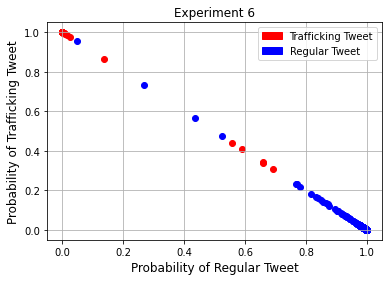

In [203]:
# print(proba)
# y = y_test.to_numpy().reshape(-1,1)


d = pd.DataFrame(proba)
y = pd.DataFrame(y_test)
# d = d[~d.index.duplicated()]
# y = y[~y.index.duplicated()]
# d['target'] = y
 # df.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)
# df = pd.concat([df, y_test], axis=1)


#tier 1 plot

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)

yt = pd.DataFrame(y_test)

for i in range(0, len(d.values)):
#     print(i)

    x = d.iloc[i, 0]
    y = d.iloc[i, 1]
    n = yt.iloc[i,0]

    if n == 0:
        color = "blue"
    elif n == 1:
        color = "red"
    else:
        color = "grey"
    ax.scatter(x, y, c =color)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
plt.title('Experiment 6')

import matplotlib.patches as mpatches

# Create the figure
red_patch = mpatches.Patch(color='red', label='Trafficking Tweet')
blue_patch = mpatches.Patch(color='blue', label='Regular Tweet')
plt.xlabel('Probability of Regular Tweet', fontsize=12)
plt.ylabel('Probability of Trafficking Tweet', fontsize=12)
plt.legend(handles=[red_patch, blue_patch])
ax.grid(True)

plt.show()


In [202]:
yt = pd.DataFrame(y_test)



0

In [39]:
#tier 2
y = tier2['target']
X = tier2.drop(columns='target')
 
# randomly partition 20% of the data for testing
# setting the seed guarantees that the split can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train['text'])
test_matrix = vectorizer.transform(X_test['text'])
regr = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
regr.fit(train_matrix, y_train)

y_pred = regr.predict(test_matrix)

# get accuracy score
accuracy_score(y_test, y_pred)
 
# get confusion matrix
confusion_matrix(y_test, y_pred)
 
# get classification_report
print(classification_report(y_test, y_pred))
proba = regr.predict_proba(test_matrix)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       982
           1       0.92      0.78      0.84       166

    accuracy                           0.96      1148
   macro avg       0.94      0.89      0.91      1148
weighted avg       0.96      0.96      0.96      1148



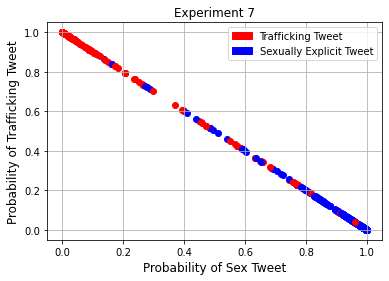

In [41]:
# print(proba)
# y = y_test.to_numpy().reshape(-1,1)

proba = regr.predict_proba(test_matrix)
d = pd.DataFrame(proba)
y = pd.DataFrame(y_test)
# d = d[~d.index.duplicated()]
# y = y[~y.index.duplicated()]
# d['target'] = y
 # df.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)
# df = pd.concat([df, y_test], axis=1)


#tier 1 plot

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)

yt = pd.DataFrame(y_test)

for i in range(0, len(d.values)):
#     print(i)

    x = d.iloc[i, 0]
    y = d.iloc[i, 1]
    n = yt.iloc[i,0]

    if n == 0:
        color = "blue"
    elif n == 1:
        color = "red"
    else:
        color = "grey"
    ax.scatter(x, y, c =color)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

plt.title('Experiment 7')

import matplotlib.patches as mpatches

# Create the figure
red_patch = mpatches.Patch(color='red', label='Trafficking Tweet')
blue_patch = mpatches.Patch(color='blue', label='Sexually Explicit Tweet')
plt.legend(handles=[red_patch, blue_patch])
plt.xlabel('Probability of Sex Tweet', fontsize=12)
plt.ylabel('Probability of Trafficking Tweet', fontsize=12)
ax.grid(True)

plt.show()

In [42]:
#tier 3
y = tier3['target']
X = tier3.drop(columns='target')
 
# randomly partition 20% of the data for testing
# setting the seed guarantees that the split can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train['text'])
test_matrix = vectorizer.transform(X_test['text'])
regr = svm.SVC(kernel='linear')
regr = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
regr.fit(train_matrix, y_train)

y_pred = regr.predict(test_matrix)

# get accuracy score
accuracy_score(y_test, y_pred)
 
# get confusion matrix
confusion_matrix(y_test, y_pred)
 
# get classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       975
           1       0.83      0.82      0.82       209

    accuracy                           0.94      1184
   macro avg       0.90      0.89      0.89      1184
weighted avg       0.94      0.94      0.94      1184



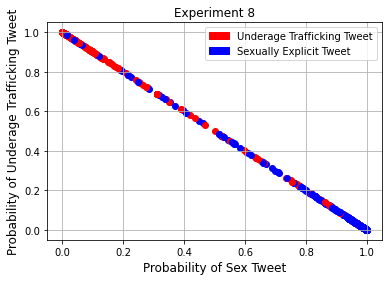

In [43]:
proba = regr.predict_proba(test_matrix)
d = pd.DataFrame(proba)
y = pd.DataFrame(y_test)
# d = d[~d.index.duplicated()]
# y = y[~y.index.duplicated()]
# d['target'] = y
 # df.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)
# df = pd.concat([df, y_test], axis=1)


#tier 1 plot

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)

yt = pd.DataFrame(y_test)

for i in range(0, len(d.values)):
#     print(i)

    x = d.iloc[i, 0]
    y = d.iloc[i, 1]
    n = yt.iloc[i,0]

    if n == 0:
        color = "blue"
    elif n == 1:
        color = "red"
    else:
        color = "grey"
    ax.scatter(x, y, c =color)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

plt.title('Experiment 8')

import matplotlib.patches as mpatches

# Create the figure
red_patch = mpatches.Patch(color='red', label='Underage Trafficking Tweet')
blue_patch = mpatches.Patch(color='blue', label='Sexually Explicit Tweet')
plt.legend(handles=[red_patch, blue_patch])
plt.xlabel('Probability of Sex Tweet', fontsize=12)
plt.ylabel('Probability of Underage Trafficking Tweet', fontsize=12)
ax.grid(True)

plt.show()

In [44]:
#tier 4
y = tier4['target']
X = tier4.drop(columns='target')
 
# randomly partition 20% of the data for testing
# setting the seed guarantees that the split can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train['text'])
test_matrix = vectorizer.transform(X_test['text'])
regr = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
regr.fit(train_matrix, y_train)

y_pred = regr.predict(test_matrix)

# get accuracy score
accuracy_score(y_test, y_pred)
 
# get confusion matrix
confusion_matrix(y_test, y_pred)
 
# get classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.14      0.13       166
           1       0.26      0.22      0.24       223

    accuracy                           0.19       389
   macro avg       0.19      0.18      0.19       389
weighted avg       0.20      0.19      0.19       389



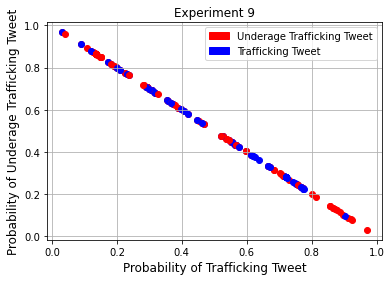

In [46]:
proba = regr.predict_proba(test_matrix)
d = pd.DataFrame(proba)
y = pd.DataFrame(y_test)
# d = d[~d.index.duplicated()]
# y = y[~y.index.duplicated()]
# d['target'] = y
 # df.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)
# df = pd.concat([df, y_test], axis=1)


#tier 1 plot

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)

yt = pd.DataFrame(y_test)

for i in range(0, len(d.values)):
#     print(i)

    x = d.iloc[i, 0]
    y = d.iloc[i, 1]
    n = yt.iloc[i,0]

    if n == 0:
        color = "blue"
    elif n == 1:
        color = "red"
    else:
        color = "grey"
    ax.scatter(x, y, c =color)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

plt.title("Experiment 9")
red_patch = mpatches.Patch(color='red', label='Underage Trafficking Tweet')
blue_patch = mpatches.Patch(color='blue', label='Trafficking Tweet')
plt.legend(handles=[red_patch, blue_patch])
plt.xlabel('Probability of Trafficking Tweet', fontsize=12)
plt.ylabel('Probability of Underage Trafficking Tweet', fontsize=12)
ax.grid(True)

plt.show()

In [47]:
#tier 5
y = tier5['target']
X = tier5.drop(columns='target')
 
# randomly partition 20% of the data for testing
# setting the seed guarantees that the split can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train['text'])
test_matrix = vectorizer.transform(X_test['text'])
regr = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
regr.fit(train_matrix, y_train)

y_pred = regr.predict(test_matrix)

# get accuracy score
accuracy_score(y_test, y_pred)
 
# get confusion matrix
confusion_matrix(y_test, y_pred)
 
# get classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       981
           1       0.13      0.15      0.14       179
           2       0.24      0.21      0.23       228

    accuracy                           0.76      1388
   macro avg       0.45      0.45      0.45      1388
weighted avg       0.75      0.76      0.76      1388



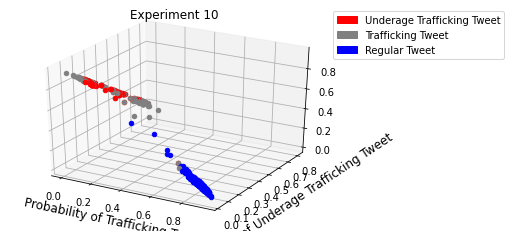

In [52]:
proba = regr.predict_proba(test_matrix)
d = pd.DataFrame(proba)
y = pd.DataFrame(y_test)
# d = d[~d.index.duplicated()]
# y = y[~y.index.duplicated()]
# d['target'] = y
 # df.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)
# df = pd.concat([df, y_test], axis=1)


#tier 1 plot

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)

yt = pd.DataFrame(y_test)
ax = plt.axes(projection ="3d")

for i in range(0, len(d.values)):
#     print(i)

    x = d.iloc[i, 0]
    y = d.iloc[i, 1]
    z = d.iloc[i, 2]
    n = yt.iloc[i,0]

    if n == 0:
        color = "blue"
    elif n == 1:
        color = "red"
    else:
        color = "grey"
    ax.scatter3D(x, y,z, c =color)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

plt.title("Experiment 10")
red_patch = mpatches.Patch(color='red', label='Underage Trafficking Tweet')
grey_patch = mpatches.Patch(color='grey', label='Trafficking Tweet')
blue_patch = mpatches.Patch(color='blue', label='Regular Tweet')
plt.legend(handles=[red_patch, grey_patch, blue_patch], bbox_to_anchor=(1.5, 1))
plt.xlabel('Probability of Trafficking Tweet', fontsize=12)
plt.ylabel('Probability of Underage Trafficking Tweet', fontsize=12)
# plt.zlabel('Probability of Regular Tweet')
ax.grid(True)

plt.show()

In [44]:
tier1.to_csv("clean_data/tier1.csv")

In [45]:
tier2.to_csv("clean_data/tier2.csv")

In [46]:
tier3.to_csv("clean_data/tier3.csv")

In [47]:
tier4.to_csv("clean_data/tier4.csv")

<h2> Experiments 1 through 5 </h2>

In [170]:
# processing algorithms

sex_words = ["anal",
            "sex",
            "porn",
            "cum",
            "pussy",
            "dick",
            "sex",
            "erotic",
            "whore",
            "slut",
            "onlyfans",
            "only fans",
            "escort",
            "nudes",
            "horny",
            "meet up",
            "swinger",
            "cumslut",
            "SugarDaddy",
            "blowjob",
            "sexy",
            "porn",
            "xxx",
            "cumslut",
            "sugardaddyneeded",
            "disponible",
            "massage",
            "cuckold",
            'ass', 
             "tits",
             'horny', 
             "wet", 
             "of", 
             "onlyfans", 
             "sessions", 
             "nudes", 
             "snapsession", 
             "cashappfriday", 
             "cheating", 
             "escort", 
             'leggings', 'Daddy', 'MorningSex',
            'adult work',
            'adultwork',
            "call girl",
            "callgirl"]

###Remove all of the hashtags
import re
def removeHash(s):
    ls = re.findall(r"#(\w+)", str(s))

    
    for i in ls:
        s = str(s).replace(i, "")
    
    return s


def createULBoolean(s):
    if s == 0 or s == "0":
        return 0
    else:
        return 1
    
def createBadWordBool(s):
 
    count = 0
    for i in sex_words:
        if i in str(s).lower():
            count += 1
    return count

femalenames = pd.read_csv("data/census-female-names.csv", header=None)
fnames = femalenames[0].to_list()

def findFemalNames(s):
    
    for name in fnames:
        if str(name).lower() in str(s).lower():
            return 1
    return 0
def url(s):
    if 'http://' in str(s) or '.com' in str(s) or 'www.' in str(s):
        return 1
    else:
        return 0
   

In [133]:
#tier 1
tier_1_not_target = pd.read_csv("data/big.csv",  encoding = "ISO-8859-1",header=None).head(5000)
tier_1_target = pd.read_csv("data/res.csv")

tier_1_target = tier_1_target[['text']]
tier_1_target['target'] = 1
tier_1_not_target = tier_1_not_target.rename(columns={5:'text'})
tier_1_not_target['target'] = 0
tier_1_not_target = tier_1_not_target[['text', 'target']]

In [137]:
tier1.head()

,url_bool,sexually_explicit_count,target
0,0,0,1
1,0,1,1
2,0,2,1
7,0,3,1
4109,0,4,1


In [148]:
tier1 = pd.concat([tier_1_target, tier_1_not_target])

tier1['text'] = tier1['text'].apply(removeHash)
tier1['url_bool'] = tier1['text'].apply(url)
tier1['sexually_explicit_count'] = tier1['text'].apply(createBadWordBool)
tier1['female_name_bool'] = tier1['text'].apply(findFemalNames)
tier1 = tier1[['url_bool', 'sexually_explicit_count', 'target']]

In [169]:
tier_2_not_target = pd.read_csv("data/justsex.csv")
tier_2_not_target.head()

,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink,timestamp,query
0,Mon Apr 12 17:40:07 +0000 2021,1363930221326438400,ndaxbarnesmedia,mickey fc fancam edit edits monday movie sebas...,https://twitter.com/ndaxbarnesmedia,nani media,https://twitter.com/ndaxbarnesmedia/status/138...,2021-04-21T00:42:41.951Z,https://twitter.com/search?q=sex&src=typed_que...
1,Wed Apr 21 00:41:54 +0000 2021,1179913549,SexTalkTuesday,"Yes, the dark side of camming + the reality th...",https://twitter.com/SexTalkTuesday,SexTalkTuesday,https://twitter.com/SexTalkTuesday/status/1384...,2021-04-21T00:42:41.951Z,https://twitter.com/search?q=sex&src=typed_que...
2,Wed Apr 21 00:41:53 +0000 2021,277544357,Lipservicephone,Not seeing someone I am talking too really all...,https://twitter.com/Lipservicephone,Lip Service Phone Sex,https://twitter.com/Lipservicephone/status/138...,2021-04-21T00:42:41.951Z,https://twitter.com/search?q=sex&src=typed_que...
3,Wed Apr 21 00:39:52 +0000 2021,833476573009416192,Sith2814,@SexTalkTuesday @JaneEBoon Last season I think...,https://twitter.com/Sith2814,▪□Kal Kent□▪,https://twitter.com/Sith2814/status/1384668169...,2021-04-21T00:42:41.951Z,https://twitter.com/search?q=sex&src=typed_que...
4,Wed Apr 21 00:42:02 +0000 2021,1277488147249709056,lilllgoblin,he looks like he would point a loaded gun at m...,https://twitter.com/lilllgoblin,A 🍒,https://twitter.com/lilllgoblin/status/1384668...,2021-04-21T00:42:41.951Z,https://twitter.com/search?q=sex&src=typed_que...


In [171]:
#tier 2
tier_2_not_target = pd.read_csv("data/justsex.csv")
tier_2_target = pd.read_csv("data/res.csv")
tier_2_not_target = tier_2_not_target.fillna(0)
tier_2_target = tier_2_target.fillna(0)
# tier_2_not_target['url_bool'] = tier_2_not_target['url'].apply(createULBoolean)
# tier_2_target['url_bool'] = tier_2_target['url'].apply(createULBoolean)

tier_2_not_target['target'] = 0
tier_2_target['target'] = 1
tier2 = pd.concat([tier_2_not_target, tier_2_target])
tier2['text'] = tier2['text'].apply(removeHash)
tier2['sexually_explicit_count'] = tier2['text'].apply(createBadWordBool)
tier2['female_name_bool'] = tier2['text'].apply(findFemalNames)
tier2['url_bool'] = tier2['text'].apply(url)

tier2 = tier2[['url_bool', 'sexually_explicit_count', 'target']]

In [185]:
#tier 3
tier_3_not_target = pd.read_csv("data/justsex.csv")
tier_3_target = pd.read_csv("data/underage_full.csv")

tier_3_not_target['target'] = 0
tier_3_target['target'] = 1


tier3 = pd.concat([tier_3_not_target, tier_3_target])
tier3['text'] = tier3['text'].apply(removeHash)
tier3['sexually_explicit_count'] = tier3['text'].apply(createBadWordBool)
tier3['female_name_bool'] = tier3['text'].apply(findFemalNames)
tier3['url_bool'] = tier3.apply(url)

tier3 = tier3[['url_bool', 'sexually_explicit_count', 'target']]

In [190]:
#tier 4
tier_4_not_target = tier_2_target
tier_4_not_target['target'] = 0
tier_4_target = tier_3_target


tier4 = pd.concat([tier_4_not_target, tier_4_target])
tier4['text'] = tier4['text'].apply(removeHash)
tier4['sexually_explicit_count'] = tier4['text'].apply(createBadWordBool)
tier4['female_name_bool'] = tier4['text'].apply(findFemalNames)
tier4['url_bool'] = tier4.apply(url)

tier4 = tier4[['url_bool', 'sexually_explicit_count', 'target']]

In [192]:
#tier 5

tier_5_not_target = tier_1_not_target
one = tier_1_target
one['target'] = 1
three = tier_3_target
three['target'] = 2

tier_5_target = pd.concat([one, three])

tier5 = pd.concat([tier_5_not_target, tier_5_target])
tier5['text'] = tier5['text'].apply(removeHash)
tier5['sexually_explicit_count'] = tier5['text'].apply(createBadWordBool)
tier5['female_name_bool'] = tier5['text'].apply(findFemalNames)
tier5['url_bool'] = tier5.apply(url)

tier5 = tier5[['url_bool', 'sexually_explicit_count', 'target']]

In [145]:
tier1 = tier1.drop_duplicates()
tier2 = tier2.drop_duplicates()
tier3 = tier3.drop_duplicates()
tier4 = tier4.drop_duplicates()
tier5 = tier5.drop_duplicates()

In [149]:

from sklearn.model_selection import train_test_split

# X captures our feature, y captures the target
y = tier1['target']
X = tier1.drop(columns='target')
 
# randomly partition 20% of the data for testing
# setting the seed guarantees that the split can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn import svm
regr = svm.SVC(kernel='linear')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# get accuracy score
accuracy_score(y_test, y_pred)
 
# get confusion matrix
confusion_matrix(y_test, y_pred)
 
# get classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.23      0.35       971
           1       0.57      0.94      0.71      1069

    accuracy                           0.60      2040
   macro avg       0.67      0.58      0.53      2040
weighted avg       0.67      0.60      0.54      2040



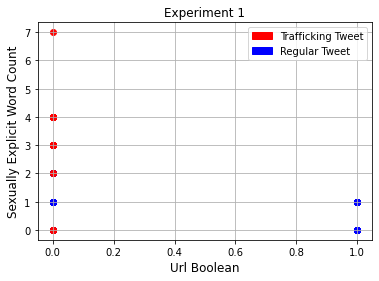

In [153]:

y = pd.DataFrame(y_test)

#tier 1 plot

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)

yt = pd.DataFrame(y_test)

for i in range(0, len(X_train)):
#     print(i)

    x = X_train.iloc[i, 0]
    y = X_train.iloc[i, 1]
    n = y_train.iloc[i]

    if n == 0:
        color = "blue"
    elif n == 1:
        color = "red"
    else:
        color = "grey"
    ax.scatter(x, y, c =color)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

plt.title("Experiment 1")
red_patch = mpatches.Patch(color='red', label='Trafficking Tweet')
blue_patch = mpatches.Patch(color='blue', label='Regular Tweet')
plt.legend(handles=[red_patch, blue_patch])
plt.xlabel('Url Boolean', fontsize=12)
plt.ylabel('Sexually Explicit Word Count', fontsize=12)
ax.grid(True)

plt.show()

In [121]:
X_train[X_train.url_bool == 0].head()

,url_bool,sexually_explicit_count


In [172]:
from sklearn.model_selection import train_test_split

# X captures our feature, y captures the target
tier2 = tier2.fillna(0)
y = tier2['target']
X = tier2.drop(columns='target')
 
# randomly partition 20% of the data for testing
# setting the seed guarantees that the split can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn import svm
regr = svm.SVC(kernel='linear')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# get accuracy score
accuracy_score(y_test, y_pred)
 
# get confusion matrix
confusion_matrix(y_test, y_pred)
 
# get classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1217
           1       0.75      0.98      0.85      1023

    accuracy                           0.84      2240
   macro avg       0.86      0.85      0.84      2240
weighted avg       0.87      0.84      0.84      2240



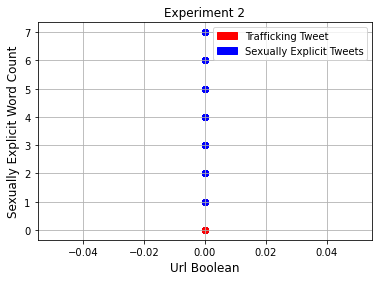

In [180]:
y = pd.DataFrame(y_test)

#tier 1 plot

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)

yt = pd.DataFrame(y_test)

for i in range(0, len(X_train)):
#     print(i)

    x = X_train.iloc[i, 0]

    y = X_train.iloc[i, 1]
    n = y_train.iloc[i]

    if n == 0:
        color = "blue"
    elif n == 1:
        color = "red"
    else:
        color = "grey"
    ax.scatter(x, y, c =color)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

plt.title("Experiment 2")
red_patch = mpatches.Patch(color='red', label='Trafficking Tweet')
blue_patch = mpatches.Patch(color='blue', label='Sexually Explicit Tweets')
plt.legend(handles=[red_patch, blue_patch])
plt.xlabel('Url Boolean', fontsize=12)
plt.ylabel('Sexually Explicit Word Count', fontsize=12)
ax.grid(True)

plt.show()

In [181]:
from sklearn.model_selection import train_test_split

# X captures our feature, y captures the target
tier3 = tier3.fillna(0)
y = tier3['target']
X = tier3.drop(columns='target')
 
# randomly partition 20% of the data for testing
# setting the seed guarantees that the split can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn import svm
regr = svm.SVC(kernel='linear')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# get accuracy score
accuracy_score(y_test, y_pred)
 
# get confusion matrix
confusion_matrix(y_test, y_pred)
 
# get classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1233
           1       0.76      0.95      0.85      1132

    accuracy                           0.83      2365
   macro avg       0.85      0.84      0.83      2365
weighted avg       0.86      0.83      0.83      2365



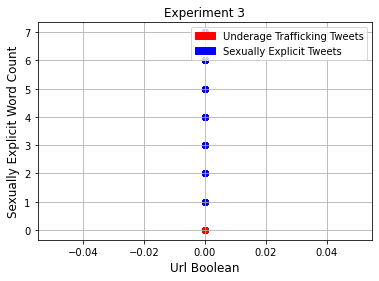

In [184]:
y = pd.DataFrame(y_test)

#tier 1 plot

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)

yt = pd.DataFrame(y_test)

for i in range(0, len(X_train)):
#     print(i)

    x = X_train.iloc[i, 0]

    y = X_train.iloc[i, 1]
    n = y_train.iloc[i]

    if n == 0:
        color = "blue"
    elif n == 1:
        color = "red"
    else:
        color = "grey"
    ax.scatter(x, y, c =color)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

plt.title("Experiment 3")
red_patch = mpatches.Patch(color='red', label='Underage Trafficking Tweets')
blue_patch = mpatches.Patch(color='blue', label='Sexually Explicit Tweets')
plt.legend(handles=[red_patch, blue_patch])
plt.xlabel('Url Boolean', fontsize=12)
plt.ylabel('Sexually Explicit Word Count', fontsize=12)
ax.grid(True)

plt.show()

In [191]:
from sklearn.model_selection import train_test_split

# X captures our feature, y captures the target
tier4 = tier4.fillna(0)
y = tier4['target']
X = tier4.drop(columns='target')
 
# randomly partition 20% of the data for testing
# setting the seed guarantees that the split can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn import svm
regr = svm.SVC(kernel='linear')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# get accuracy score
accuracy_score(y_test, y_pred)
 
# get confusion matrix
confusion_matrix(y_test, y_pred)
 
# get classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1036
           1       0.53      1.00      0.69      1169

    accuracy                           0.53      2205
   macro avg       0.27      0.50      0.35      2205
weighted avg       0.28      0.53      0.37      2205



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y = pd.DataFrame(y_test)

#tier 1 plot

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)

yt = pd.DataFrame(y_test)

for i in range(0, len(X_train)):
#     print(i)

    x = X_train.iloc[i, 0]

    y = X_train.iloc[i, 1]
    n = y_train.iloc[i]

    if n == 0:
        color = "blue"
    elif n == 1:
        color = "red"
    else:
        color = "grey"
    ax.scatter(x, y, c =color)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

plt.title("Experiment 4")
red_patch = mpatches.Patch(color='red', label='Underage Trafficking Tweets')
blue_patch = mpatches.Patch(color='blue', label='Trafficking Tweets')
plt.legend(handles=[red_patch, blue_patch])
plt.xlabel('Url Boolean', fontsize=12)
plt.ylabel('Sexually Explicit Word Count', fontsize=12)
ax.grid(True)

plt.show()

In [193]:
from sklearn.model_selection import train_test_split

# X captures our feature, y captures the target
tier5 = tier5.fillna(0)
y = tier5['target']
X = tier5.drop(columns='target')
 
# randomly partition 20% of the data for testing
# setting the seed guarantees that the split can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn import svm
regr = svm.SVC(kernel='linear')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# get accuracy score
accuracy_score(y_test, y_pred)
 
# get confusion matrix
confusion_matrix(y_test, y_pred)
 
# get classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.19      0.28      1001
           1       0.00      0.00      0.00      1017
           2       0.38      0.91      0.53      1187

    accuracy                           0.40      3205
   macro avg       0.30      0.37      0.27      3205
weighted avg       0.31      0.40      0.29      3205



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
.52